In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
import numpy as np
import itertools
plt.style.use('fivethirtyeight')

In [16]:
db = pd.read_csv('Iris_with_outliers.csv')

display(db)

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa
...,...,...,...,...,...,...,...
168,168,168,6.8,3.0,5.5,2.1,Iris-virginica
169,169,169,6.4,2.7,5.3,1.9,Iris-virginica
170,170,170,7.2,3.6,6.1,2.5,Iris-virginica
171,171,171,6.3,3.3,6.0,2.5,Iris-virginica


In [17]:
df = db.drop(columns=['Unnamed: 0', 'Id'])  # Drop columns
X = df.iloc[:, :-1] 

In [18]:
# Replace NaN values
X.fillna(X.mean(), inplace=True)

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

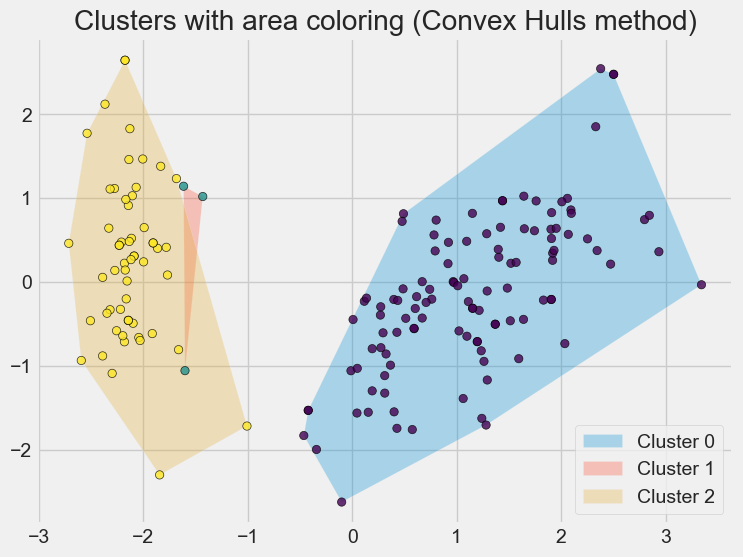

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))

for cluster_label in np.unique(df['Cluster']):
    cluster_points = X_pca[df['Cluster'] == cluster_label]
    
    if len(cluster_points) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices]
        
        plt.fill(hull_points[:, 0], hull_points[:, 1], alpha=0.3, label=f'Cluster {cluster_label}')

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', edgecolor='k', alpha=0.8)

plt.title('Clusters with area coloring (Convex Hulls method)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()
